In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [55]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer


In [56]:
data=pd.read_csv('amazon_reviews.csv')
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [57]:
data.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [58]:
data["reviewText"].isnull().sum()
data["reviewText"]=data["reviewText"].fillna('missing')
data["reviewText"].isnull().sum()

np.int64(0)

In [59]:
print(len(data))
print(data.shape)

4915
(4915, 12)


In [60]:
data=data.head(500)

In [61]:
print(len(data))
print(data.shape)

500
(500, 12)


In [62]:
example=data["reviewText"][8]
example

'Works in a HTC Rezound.  Was running short of space on a 64GB Sandisk so I ordered this when it came out, fast and no issues.'

In [63]:
word_tokenize(example)

['Works',
 'in',
 'a',
 'HTC',
 'Rezound',
 '.',
 'Was',
 'running',
 'short',
 'of',
 'space',
 'on',
 'a',
 '64GB',
 'Sandisk',
 'so',
 'I',
 'ordered',
 'this',
 'when',
 'it',
 'came',
 'out',
 ',',
 'fast',
 'and',
 'no',
 'issues',
 '.']

In [64]:
data["reviewText"]=data["reviewText"].str.lower()

In [65]:
import re

In [66]:
data["reviewText"]=data["reviewText"].apply(lambda text:re.sub(r'[^\w\s]','',text))


In [67]:
data["reviewText"]=data["reviewText"].apply(word_tokenize)

In [68]:
stop_words=set(stopwords.words('english'))

In [69]:
data["reviewText"]=data["reviewText"].apply(lambda words:[word for word in words if word not in stop_words])

In [70]:
lemmatizer=WordNetLemmatizer()

In [71]:
data["reviewText"]=data["reviewText"].apply(lambda words:[lemmatizer.lemmatize(word) for word in words])

In [72]:
data["reviewText"]=data["reviewText"].apply(lambda words:' '.join(words))

In [73]:
sia=SentimentIntensityAnalyzer()

In [74]:
data["senti"]=data["reviewText"].apply(lambda text:sia.polarity_scores(text)['compound'])

In [75]:
def sentiment_analysis():
    if data["senti"]>0:
        print('positive')
    elif data["senti"]<0:
        print('negative')
    else:
        print('neutral')
        

In [79]:
data["sentiment"]=data["senti"].apply(lambda score:'positive' if score>0 else('negative' if score<0 else'neutral'))

In [80]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,senti,sentiment
0,0,NaN,4,issue,2014-07-23,138,0,0,0,0,0.0,0.0,0.0000,neutral
1,1,0mie,5,purchased device worked advertised never much ...,2013-10-25,409,0,0,0,0,0.0,0.0,0.0000,neutral
2,2,1K3,4,work expected sprung higher capacity think mad...,2012-12-23,715,0,0,0,0,0.0,0.0,0.4019,positive
3,3,1m2,5,think worked greathad diff bran 64gb card went...,2013-11-21,382,0,0,0,0,0.0,0.0,0.6486,positive
4,4,2&amp;1/2Men,5,bought retail packaging arrived legit orange e...,2013-07-13,513,0,0,0,0,0.0,0.0,0.8591,positive


<Axes: title={'center': 'sentimental counts'}, xlabel='sentiment'>

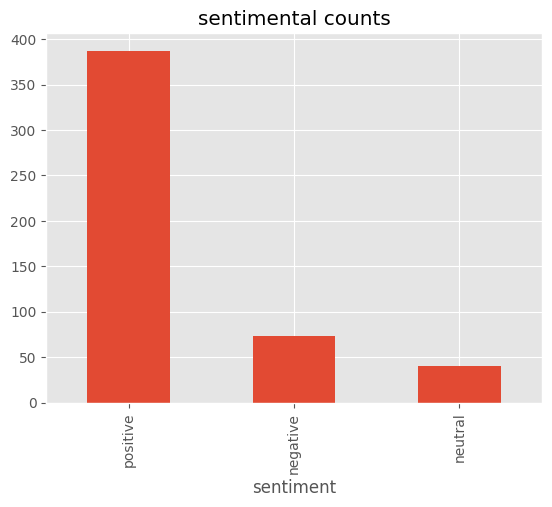

In [84]:
data["sentiment"].value_counts().plot(kind='bar',title='sentimental counts')

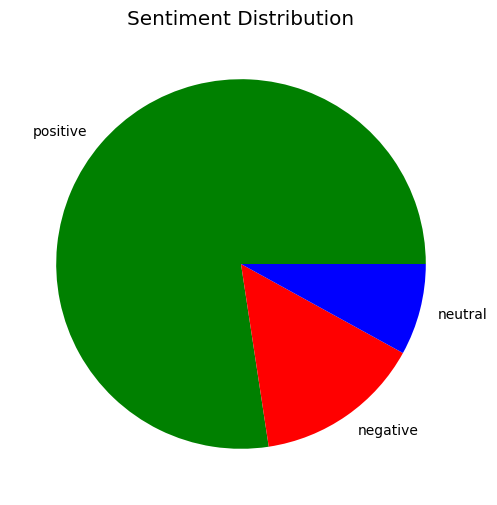

In [90]:
plt.figure(figsize=(6,6))
data["sentiment"].value_counts().plot(kind='pie', colors=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.ylabel("") 
plt.show()


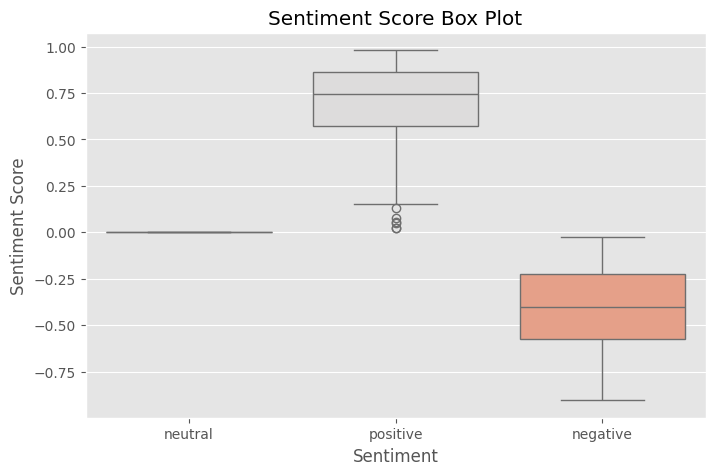

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="sentiment", y="senti",data=data, palette="coolwarm",hue='sentiment')
plt.title("Sentiment Score Box Plot")
plt.xlabel("Sentiment")
plt.ylabel("Sentiment Score")
plt.show()
